In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/SHIFT/desafio/baba/BABA.csv", )

In [ ]:
df['date'] = pd.to_datetime(df['date'].astype(str), format='%Y%m%d')

In [ ]:
print(df['date'].head())

0   2014-08-01
1   2014-08-02
2   2014-08-03
3   2014-08-04
4   2014-08-05
Name: date, dtype: datetime64[ns]


In [ ]:
df

,Unnamed: 0,X,date,mes,weekday,margem,venda,desconto,outdesc,outmg
0,1,1,2014-08-01,agosto,sexta-feira,0.406111,110042.460,9190.907534,0,0
1,2,2,2014-08-02,agosto,sabado,0.416022,58377.320,5713.043012,0,0
2,3,3,2014-08-03,agosto,domingo,0.431993,64635.390,8621.708915,0,0
3,4,4,2014-08-04,agosto,segunda-feira,0.409216,140417.321,18312.965640,0,0
4,5,5,2014-08-05,agosto,terca-feira,0.449648,149700.286,19942.741300,0,0
...,...,...,...,...,...,...,...,...,...,...
391,392,392,2015-08-27,agosto,quinta-feira,0.451562,NaN,5846.133551,0,0
392,393,393,2015-08-28,agosto,sexta-feira,0.472608,NaN,2657.847261,0,0
393,394,394,2015-08-29,agosto,sabado,0.385612,NaN,269.530000,0,0
394,395,395,2015-08-30,agosto,domingo,0.495615,NaN,3434.838118,0,0


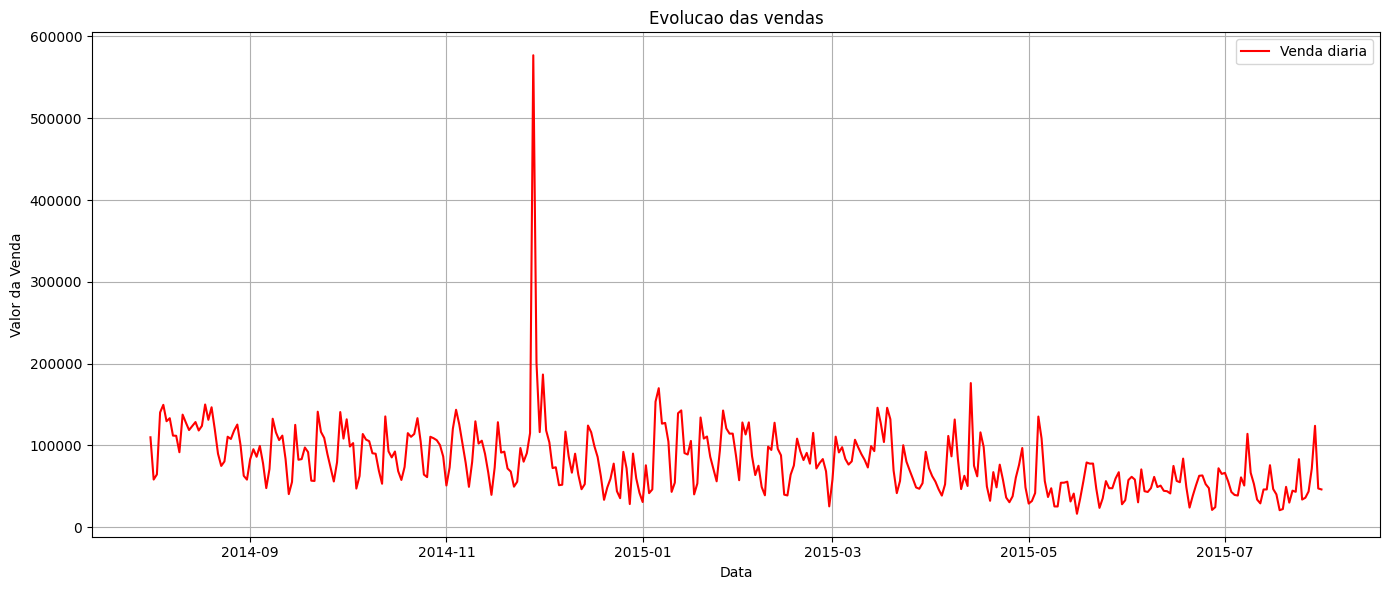

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(df['date'], df['venda'], label='Venda diaria', color='red' )
plt.xlabel('Data')
plt.ylabel('Valor da Venda')
plt.title('Evolucao das vendas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_mes = df.groupby('mes')['venda'].sum().reset_index()
fig = px.bar(df_mes, x='mes', y='venda', title='Venda acumulada por mês')
fig.show()

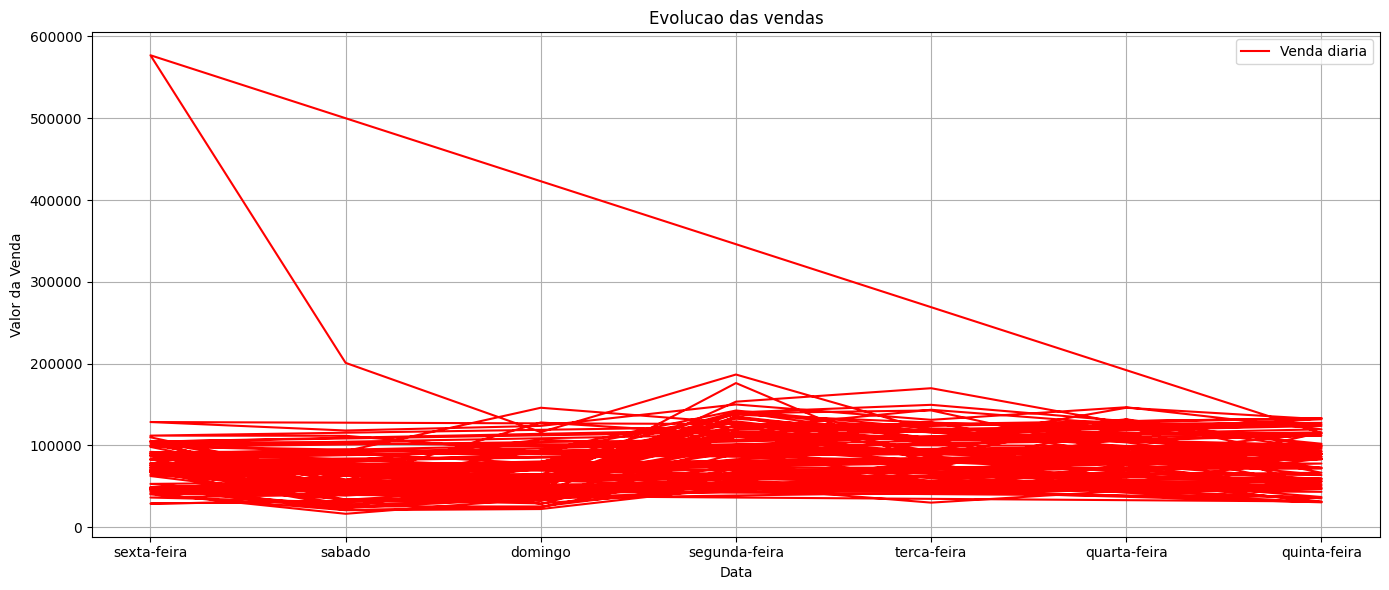

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(df['weekday'], df['venda'], label='Venda diaria', color='red' )
plt.xlabel('Data')
plt.ylabel('Valor da Venda')
plt.title('Evolucao das vendas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

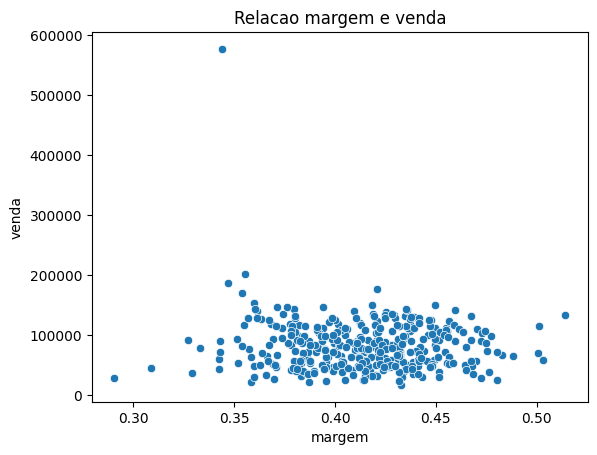

In [ ]:
sns.scatterplot(data=df, x='margem', y='venda')
plt.title('Relacao margem e venda')
plt.show()

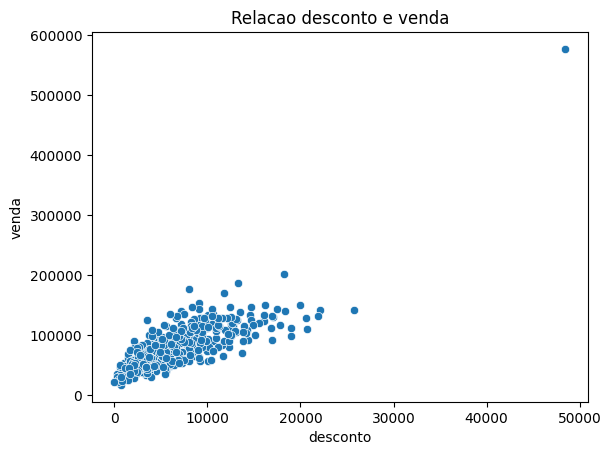

In [ ]:
sns.scatterplot(data=df, x='desconto', y='venda')
plt.title('Relacao desconto e venda')
plt.show()


In [ ]:

treino = df.iloc[0:365]
teste = df.iloc[366:396]

x_treino = treino[['desconto', 'margem', 'outdesc']]
y_treino = treino['venda']
x_teste = teste[['desconto', 'margem', 'outdesc']]
mod = LinearRegression()
mod.fit(x_treino, y_treino)

prev =  mod.predict(x_teste)

pd.DataFrame(prev).to_csv('predict.csv')
files.download('predict.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

### Linear Regression com features margem, desconto, weekday

In [ ]:
# Features mais relevantes
features = ['margem', 'desconto', 'weekday']

# Separar treino e teste
treino = df.iloc[0:365]
teste = df.iloc[366:396]

# Definir X e y
X_treino = treino[features]
y_treino = treino['venda']
X_teste = teste[features]
y_teste = teste['venda']

# Pré-processamento para coluna categórica 'weekday'
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), ['weekday'])], remainder='passthrough')

# Pipeline com pré-processamento e modelo
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])

# Treinar modelo
pipeline.fit(X_treino, y_treino)

# Fazer previsão
prev = pipeline.predict(X_teste)

# Exportar previsão
resultado = teste[['date']].copy()
resultado['prev_venda'] = prev


### Random Forest com features margem, desconto, weekday, dias_no_mes, fim_semana, venda_dia_anterior

In [ ]:
# Criar variável de tendência temporal
df['date'] = pd.to_datetime(df['date'].astype(str))
df['dias_no_mes'] = df['date'].dt.day

# Criar variável binária: é fim de semana?
df['fim_semana'] = df['weekday'].isin(['sabado', 'domingo']).astype(int)

# Criar defasagem: venda do dia anterior
df['venda_dia_anterior'] = df['venda'].shift(1).bfill()

# Definir features
features = ['margem', 'desconto', 'weekday', 'dias_no_mes', 'fim_semana', 'venda_dia_anterior']

# Separar treino e teste
treino = df.iloc[0:365]
teste = df.iloc[366:396]

X_treino = treino[features]
y_treino = treino['venda']
X_teste = teste[features]
y_teste = teste['venda']

# Pré-processamento para variável categórica weekday
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), ['weekday'])], remainder='passthrough')

# Pipeline com RandomForest
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Treinar modelo
pipeline.fit(X_treino, y_treino)

# Previsão
prev = pipeline.predict(X_teste)

# Exportar resultado
resultado = teste[['date']].copy()
resultado['prev_venda'] = prev




In [ ]:
treino = df.iloc[0:365]
teste = df.iloc[366:396]

x_treino = treino[['desconto', 'margem']]
y_treino = treino['venda']
x_teste = teste[['desconto', 'margem']]
mod = RandomForestRegressor()
mod.fit(x_treino, y_treino)

prev =  mod.predict(x_teste)
pd.DataFrame(prev).to_csv('predict.csv')
files.download('predict.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import pandas as pd

# Criar features adicionais
df['date'] = pd.to_datetime(df['date'].astype(str))
df['dias_no_mes'] = df['date'].dt.day
df['fim_semana'] = df['weekday'].isin(['sabado', 'domingo']).astype(int)
df['venda_dia_anterior'] = df['venda'].shift(1).bfill()

# Separar treino e teste conforme o desafio
treino = df.iloc[0:365]
teste = df.iloc[366:396]

features = ['margem', 'desconto', 'weekday', 'dias_no_mes', 'fim_semana', 'venda_dia_anterior']

X_treino = treino[features]
y_treino = treino['venda']
X_teste = teste[features]

# Pré-processador
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), ['weekday'])],
    remainder='passthrough'
)

# RandomForest pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# DecisionTree pipeline
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=5, random_state=42))
])

# Treinar ambos
rf_pipeline.fit(X_treino, y_treino)
dt_pipeline.fit(X_treino, y_treino)

# Prever no teste (30 linhas)
y_pred_rf = rf_pipeline.predict(X_teste)
y_pred_dt = dt_pipeline.predict(X_teste)

# Ensemble simples: média das previsões
y_pred_ensemble = (y_pred_rf + y_pred_dt) / 2

# Gerar DataFrame para submissão
predict_df = pd.DataFrame({
    '1': range(1, 31),
    '80862.4047641873': y_pred_ensemble
})

# Salvar arquivo
predict_df.to_csv('predict.csv', index=False)

print("Arquivo predict.csv gerado corretamente com ensemble (30 linhas)!")

# Para Colab: baixar
from google.colab import files
files.download('predict.csv')

Arquivo predict.csv gerado corretamente com ensemble (30 linhas)!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>